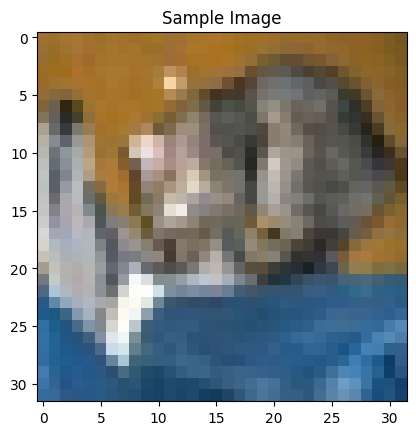

Shape after flattening: (1, 256)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()
sample_image = x_test[0]
plt.imshow(sample_image)
plt.title("Sample Image")
plt.show()

# Convert to grayscale for simplicity and change dtype to float32
gray_image = tf.image.rgb_to_grayscale(sample_image)
gray_image = tf.cast(gray_image, dtype=tf.float32)

# Apply a convolutional filter
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', activation=None)
conv_image = conv_layer(gray_image[np.newaxis, ...])
conv_image = tf.squeeze(conv_image)

# Apply ReLU
relu_image = tf.keras.layers.ReLU()(conv_image)

# Pooling (Max Pooling)
pooling_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)
pooled_image = pooling_layer(relu_image[np.newaxis, ..., np.newaxis])

# Flattening
flatten_layer = tf.keras.layers.Flatten()
flattened_output = flatten_layer(pooled_image)

print("Shape after flattening:", flattened_output.shape)
